In [2]:
import pandas as pd 
import numpy as np                    
import seaborn as sns                  
import matplotlib.pyplot as plt  
%matplotlib inline 
import warnings  

first import the datasets from ur pc to jupyter notebook before executing the below code


In [3]:
train=pd.read_csv("train_dataset.csv") 
test=pd.read_csv("test_dataset.csv")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.shape


(614, 13)

In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

to find missing values the above code


### Univariate Analysis 


In [9]:

train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: >

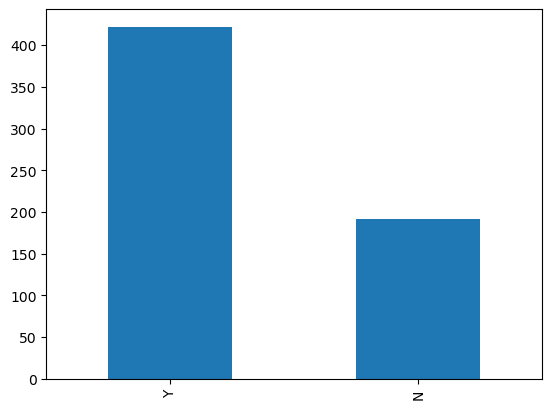

In [10]:

train['Loan_Status'].value_counts().plot.bar()

 The loan of 422 people out of 614 was approved.
 The approval rate is around 69%

 #### Categorical Variable

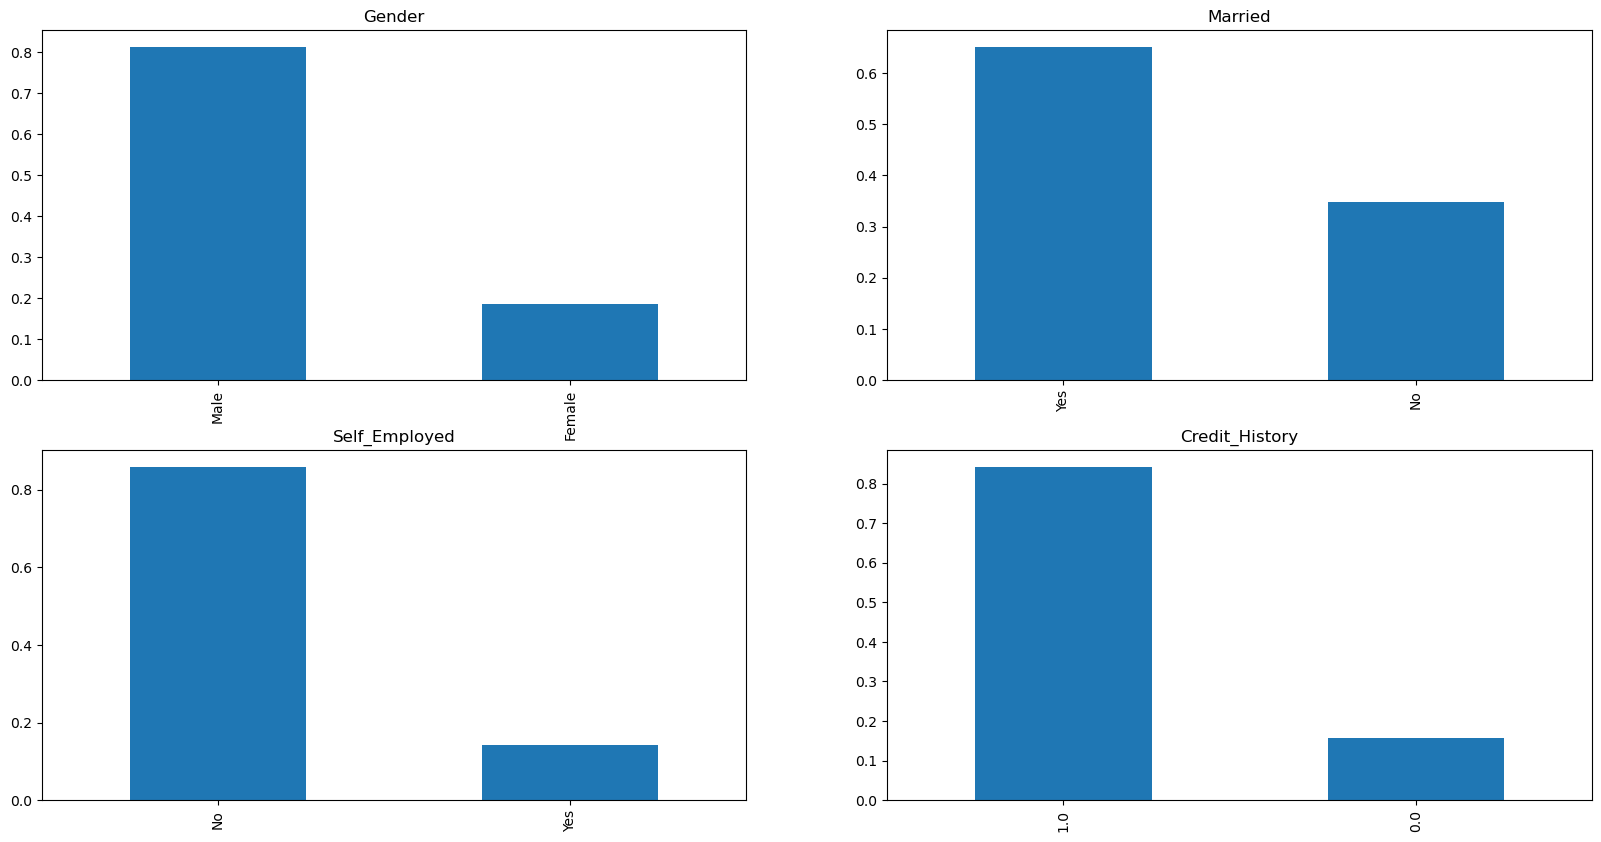

In [11]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts.

### Ordinal Variable

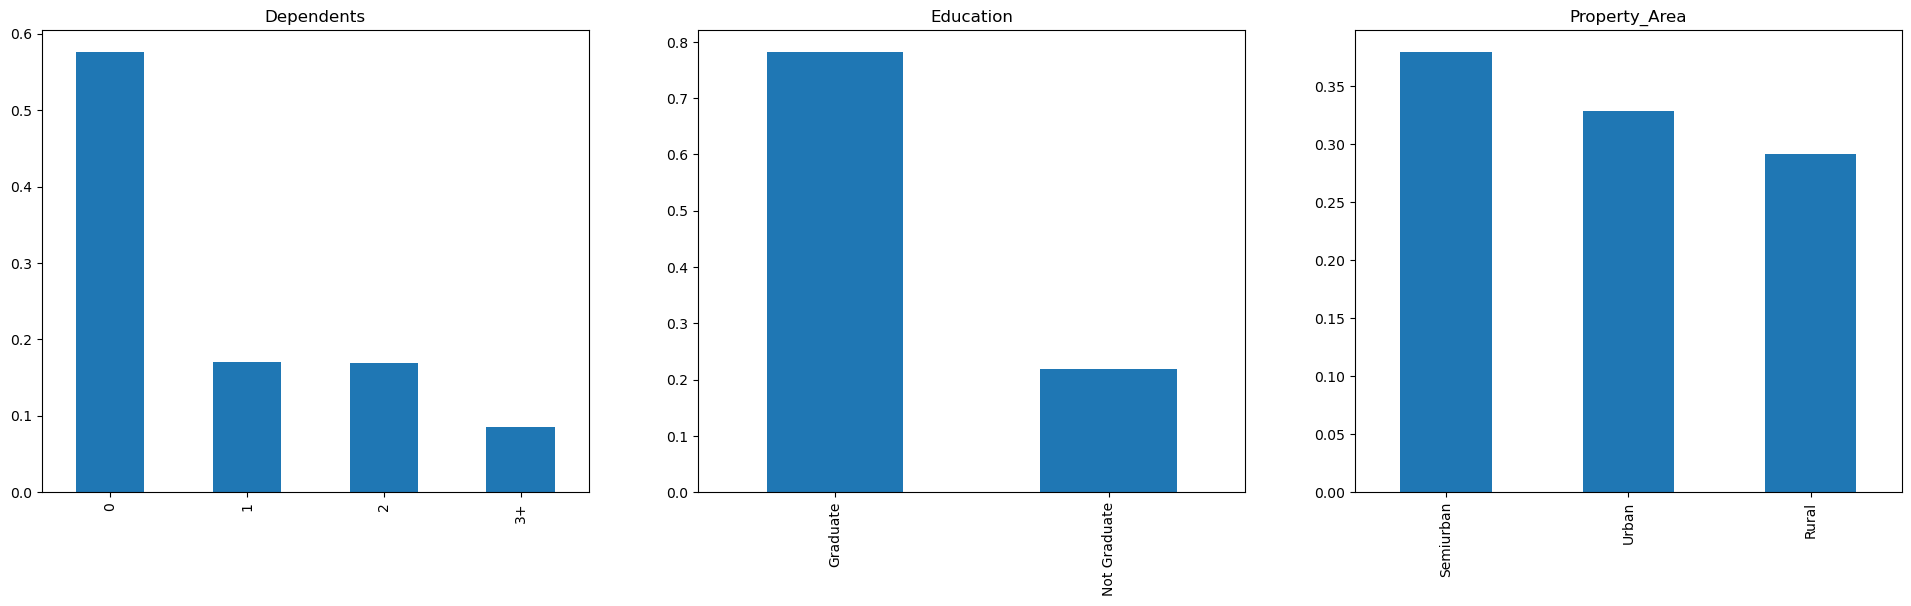

In [12]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Following inferences can be made from the above bar plots:

 Most of the applicants don’t have any dependents.
 Around 80% of the applicants are Graduate.
 Most of the applicants are from Semiurban area.

### Numerica Variable

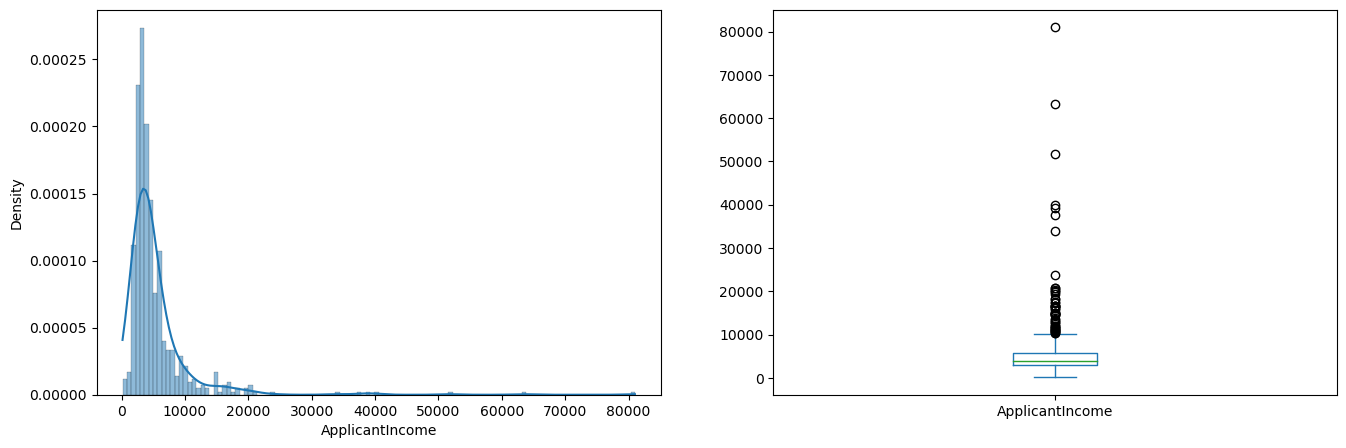

In [16]:
plt.figure(1) 
plt.subplot(121) 
sns.histplot(train['ApplicantIncome'], kde=True, stat="density"); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

 It can be inferred that most of the data in the distribution of applicant income is towards __left__ which means it is __not normally distributed__. 
The boxplot confirms the __presence of a lot of outliers/extreme values__. This can be attributed to the __income disparity__ in the society

Text(0.5, 0.98, '')

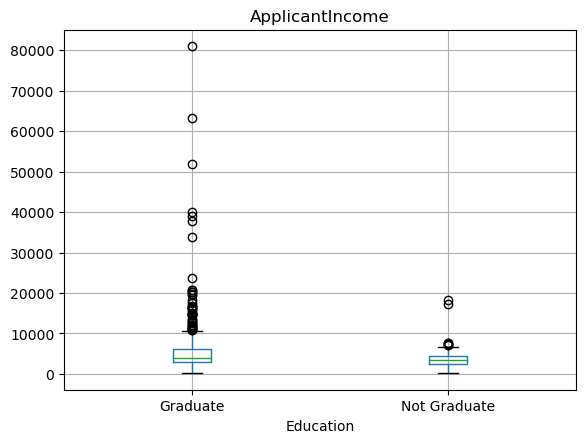

In [17]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")


We can see that there are a __higher number__ of graduates with very high incomes, which are appearing to be the __outliers__.

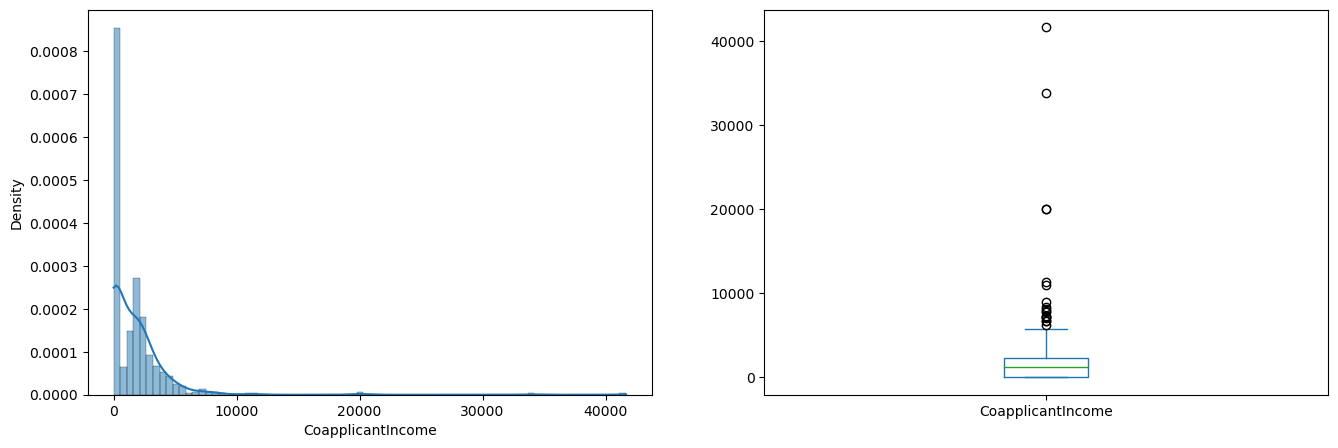

In [19]:
plt.figure(1) 
plt.subplot(121) 
sns.histplot(train['CoapplicantIncome'], kde=True, stat="density"); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

In [ ]:
* Majority of coapplicant’s income ranges from __0 to 5000.__
* We also see a lot of outliers in the coapplicant income and it is __not normally distributed.__

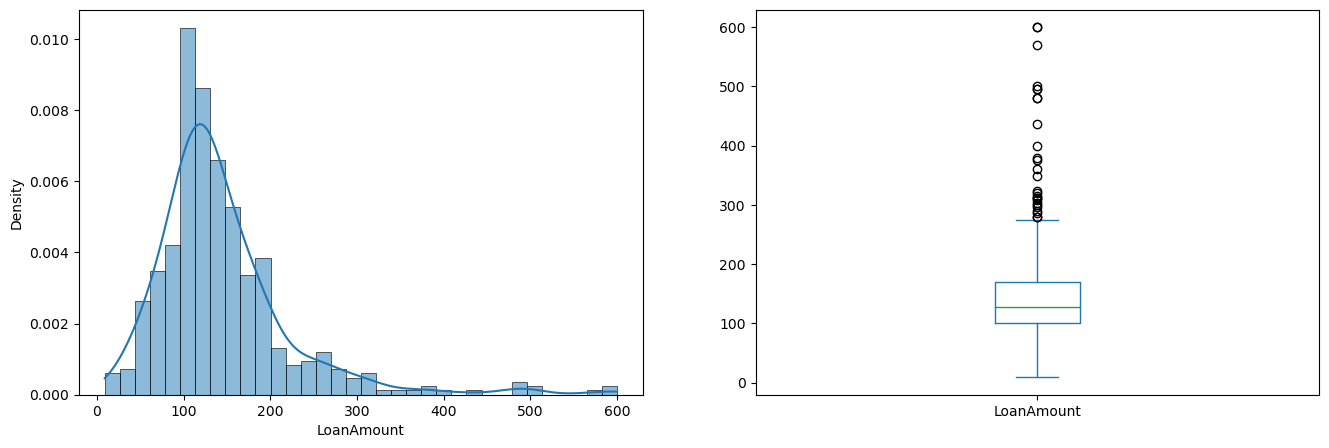

In [20]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.histplot(df['LoanAmount'], kde=True, stat="density"); 
plt.subplot(122) 
df['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

 Outliers are present 
 the distribution is fairly normal. 

## Bivariate Analysis

### Categorical Variable vs Target Variable

<Axes: xlabel='Gender'>

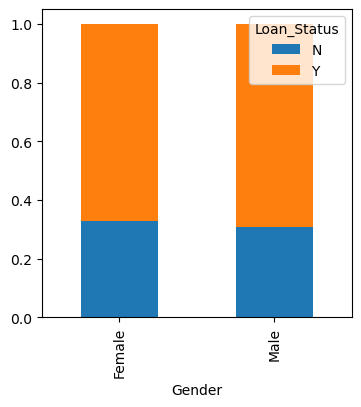

In [21]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

 It can be inferred that the proportion of male and female applicants is more or less __same__ for both approved and unapproved loans.

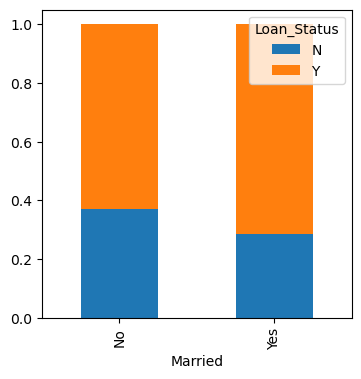

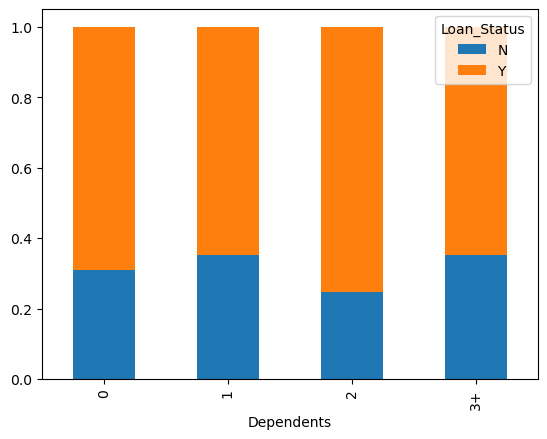

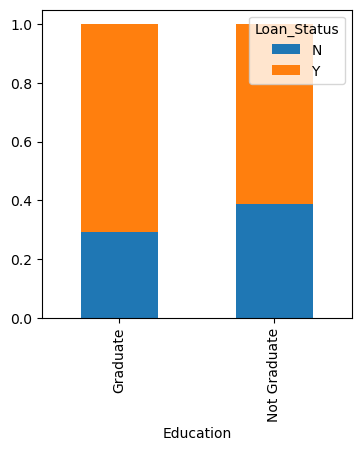

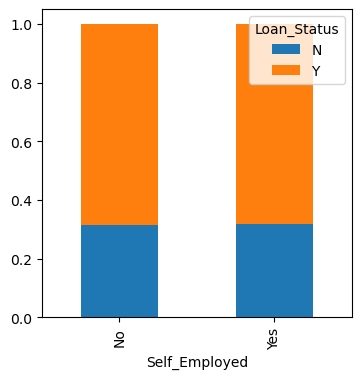

In [22]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

 Proportion of __married applicants__ is __higher__ for the approved loans.
Distribution of applicants with __1 or 3+ dependents__ is __similar__ across both the categories of Loan_Status.
There is __nothing significant__ we can infer from __Self_Employed vs Loan_Status plot.__

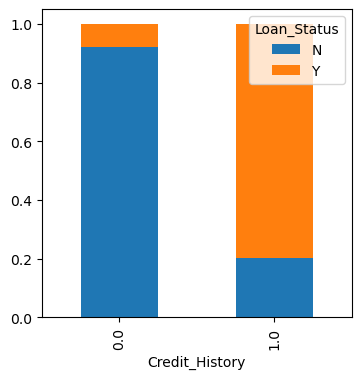

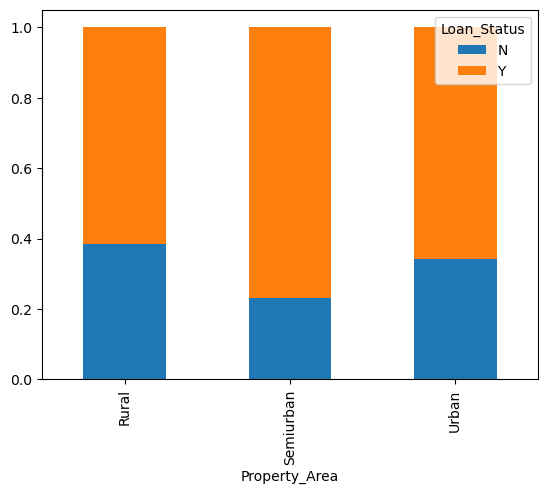

In [23]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

It seems people with __credit history as 1__ are __more likely__ to get their loans approved.
Proportion of loans getting approved in __semiurban area__ is __higher__ as compared to that in rural or urban areas.

### Numerical Variable vs Target Variable

<Axes: xlabel='Loan_Status'>

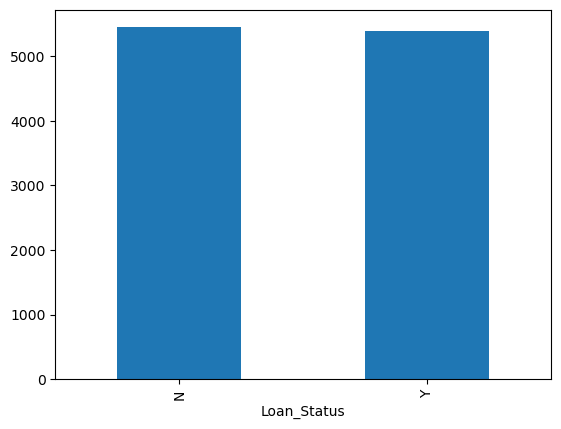

In [24]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

There is not visible difference between __the mean income__ of people for which the loan has been __approved__ vs the mean income of people for which the loan has __not been approved.__

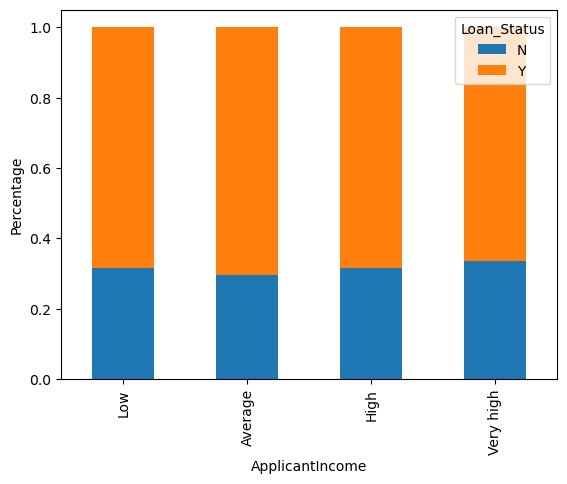

In [25]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

Analysing bins for the applicant income variable based on the values in it and the corresponding loan status for each bin.It can be inferred that __Applicant income__ __does not affect__ the chances of __loan approval__ 

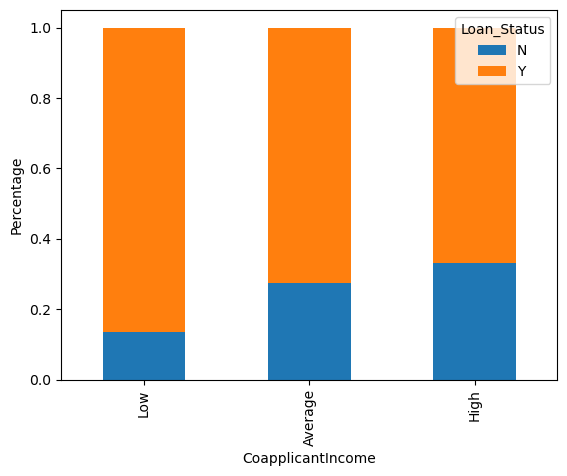

In [26]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

 __coapplicant’s income__ is less the chances of loan approval are high

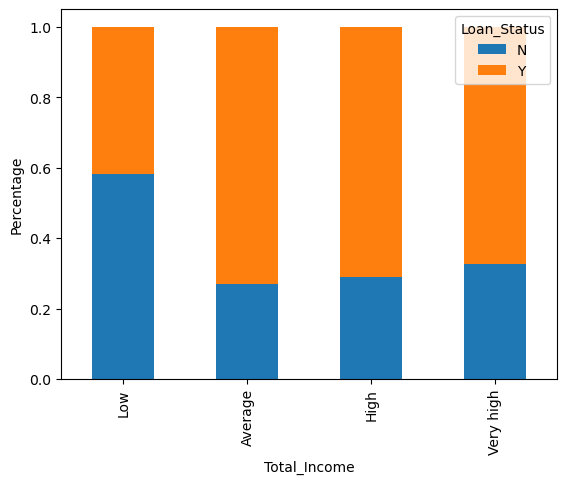

In [27]:
#new variable in which we will combine the applicant’s and coapplicant’s income t
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

Proportion of loans getting approved for applicants having __low Total_Income__ is __very less__ as compared to that of applicants with __Average, High and Very High Income.__

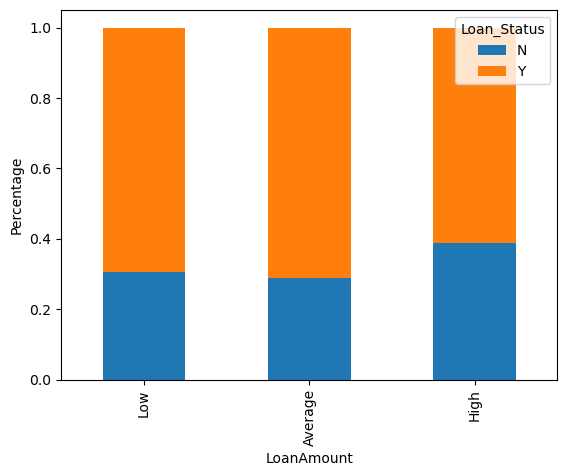

In [28]:
bins=[0,100,200,700]
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')


 the proportion of approved loans is __higher__ for __Low and Average Loan Amount__ as compared to that of High Loan Amo

In [ ]:
# drop the bins, change the 3+ in dependents variable to 3, convert the target variable’s categories into 0 and 1 

train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

<Axes: >

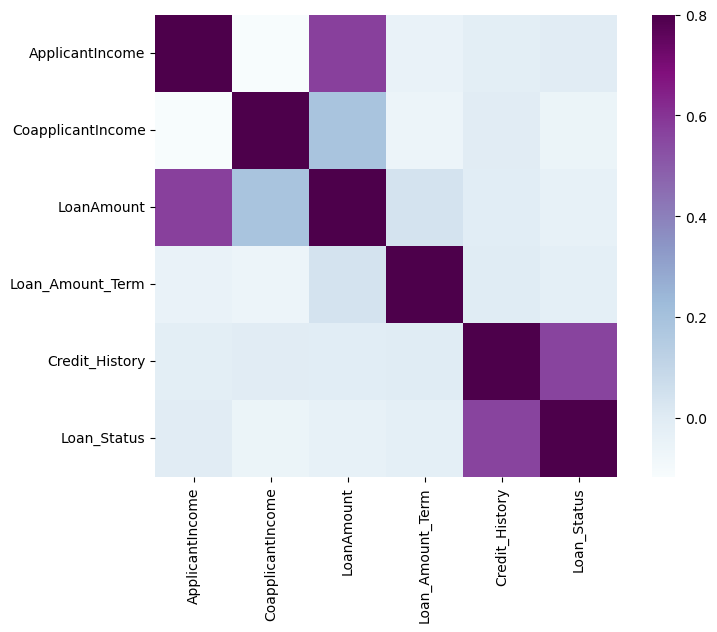

In [32]:
# heat map to visualize the correlation
matrix = train.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

<Axes: >

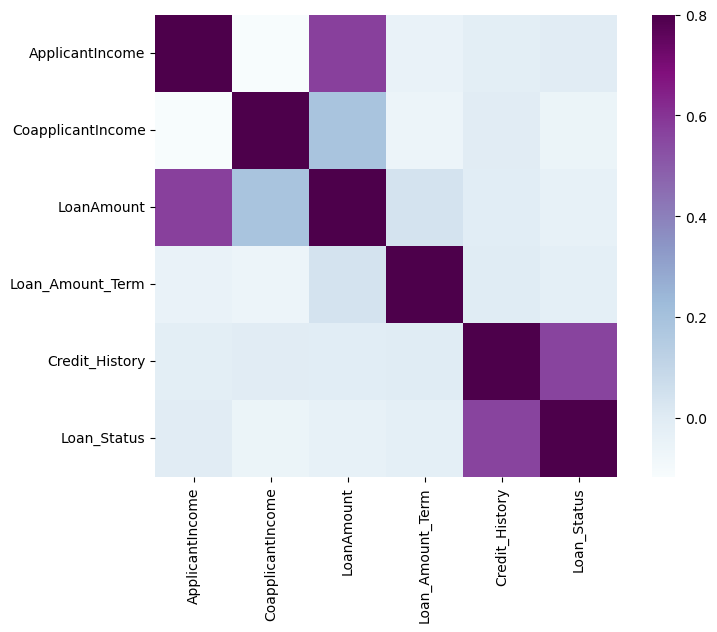

In [33]:
matrix = train.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

Highly correlated variables are __(ApplicantIncome - LoanAmount)__
 Also __(Credit_History - Loan_Status).__ is higly correlated
__LoanAmount__ is also correlated with __CoapplicantIncome.__

 ## Missing Values and Outlier Treatment 

In [34]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.
For numerical variables: imputation using mean or median
For categorical variables: imputation using mode

In [35]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [36]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [38]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [39]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [40]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

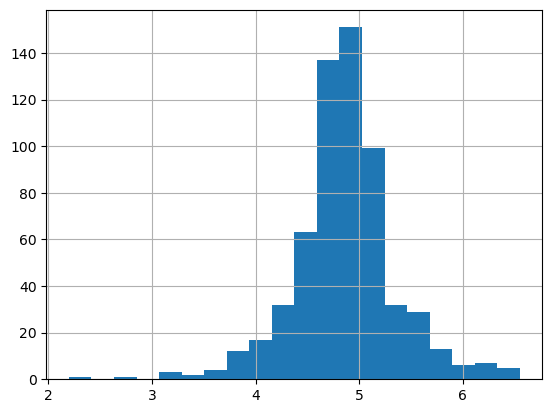

In [42]:

train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 

In [43]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

### Feature Engineering

In [44]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

combine the Applicant Income and Coapplicant Income

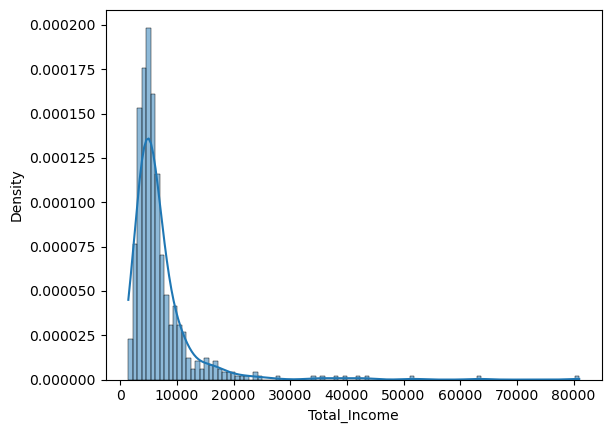

In [46]:
sns.histplot(train['Total_Income'],kde=True, stat="density" );

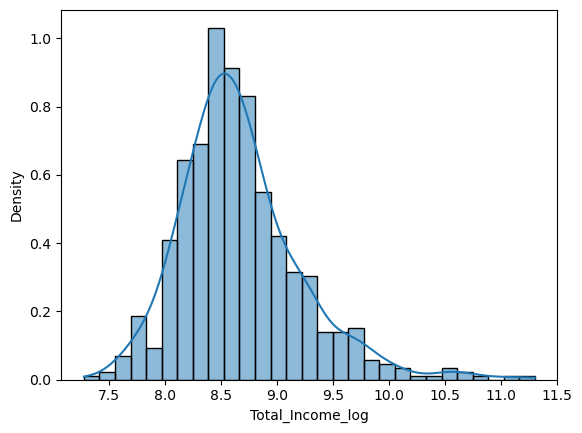

In [49]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.histplot(train['Total_Income_log'], kde=True, stat="density"); 
test['Total_Income_log'] = np.log(test['Total_Income'])

 After taking the log transformation to make the distribution normal.
Now the distribution looks much closer to normal 

In [50]:
x = train.iloc[:, np.r_[1:5,9:11,13:15]].values
y = train.iloc[:,12].values

x

array([['Male', 'No', '0', ..., 1.0, 4.852030263919617, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [51]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [52]:
print("per of missing gender is %2f%%" %((train['Gender'].isnull().sum()/train.shape[0])*100))

per of missing gender is 0.000000%


number of people who take loan as group by gender:
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

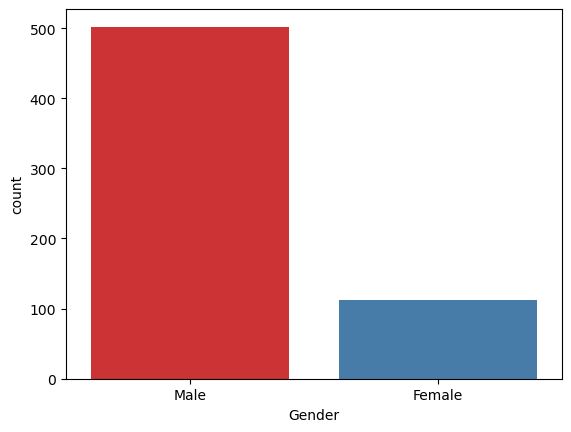

In [53]:
print("number of people who take loan as group by gender:")
print(train['Gender'].value_counts())
sns.countplot(x='Gender', data=train, palette='Set1')

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()

In [70]:

for i in range(0,5):
    X_train[:,i] = LabelEncoder_x.fit_transform(X_train[:,i].astype(str))
    X_train[:,7] = LabelEncoder_x.fit_transform(X_train[:,7].astype(str))
    
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 331],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 8],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 303],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 312],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 387],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 338]], dtype=object)

In [71]:
LabelEncoder_y = LabelEncoder()
y_train = LabelEncoder_x.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [73]:
for i in range(0,5):
    X_test[:, i] = LabelEncoder_x.fit_transform(X_test[:,i].astype(str))
    X_test[:, 7] = LabelEncoder_x.fit_transform(X_test[:,7].astype(str))

X_test

array([[1, 0, 0, 0, 4, 1.0, 4.430816798843313, 25],
       [0, 0, 0, 0, 4, 1.0, 4.718498871295094, 115],
       [1, 1, 0, 0, 4, 1.0, 5.780743515792329, 13],
       [1, 1, 0, 0, 4, 1.0, 4.700480365792417, 78],
       [1, 1, 2, 0, 4, 1.0, 4.574710978503383, 106],
       [1, 1, 0, 1, 2, 0.0, 5.10594547390058, 38],
       [1, 1, 3, 0, 2, 1.0, 5.056245805348308, 50],
       [1, 0, 0, 0, 4, 1.0, 6.003887067106539, 80],
       [1, 0, 0, 0, 4, 0.0, 4.820281565605037, 24],
       [1, 1, 0, 0, 4, 1.0, 4.852030263919617, 29],
       [0, 0, 0, 0, 4, 1.0, 4.430816798843313, 16],
       [1, 1, 1, 0, 4, 1.0, 4.553876891600541, 102],
       [0, 0, 0, 0, 4, 1.0, 5.634789603169249, 67],
       [1, 1, 2, 0, 4, 1.0, 5.4638318050256105, 68],
       [1, 1, 0, 0, 4, 1.0, 4.564348191467836, 85],
       [1, 1, 1, 0, 4, 1.0, 4.204692619390966, 106],
       [1, 0, 1, 1, 4, 1.0, 5.247024072160486, 4],
       [1, 0, 0, 1, 4, 1.0, 4.882801922586371, 111],
       [0, 0, 0, 0, 4, 1.0, 4.532599493153256, 1],
       [1

In [74]:
LabelEncoder_y = LabelEncoder()
y_test = LabelEncoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [80]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [79]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier()


rf_clf.fit(X_train, y_train)  


RandomForestClassifier()

In [77]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test) 
accuracy = metrics.accuracy_score(y_test, y_pred) 


print("Accuracy of the random forest classifier is:", accuracy)
print("Predicted labels (y_pred):", y_pred)


Accuracy of the random forest classifier is: 0.7154471544715447
Predicted labels (y_pred): [0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1
 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 0 1 0 1 1 1 0 1]


In [81]:
from sklearn.naive_bayes import GaussianNB  
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train) 


GaussianNB()

In [82]:
y_pred = nb_classifier.predict(X_test) 
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy of Gaussian Naive Bayes:", accuracy)


Accuracy of Gaussian Naive Bayes: 0.8292682926829268


In [83]:
print(y_pred)


[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
